# DATA VISUALIZATION

In this file, we are going to visualize our data corpus. As described in the README (acllmdb_v1/acllmdb/README), we have a corpus of 50000 text documents. We will use various visualization techniques to gain insights into the data, such as word clouds, frequency distributions, and more. The dataset contains 25k training and 25k test documents. We will load all of the training files and visualize.

In [ ]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('../')

import nltk
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import string
import re

nltk.download('punkt_tab')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from utils import utils

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
train_path = '../../aclImdb_v1/aclImdb/train'

We have two separate classes : negative comments and positive ones. To stay consistent, we will load positive comments together and then negative comments together and then analyze physically what makes the difference between these two sets in other words, which words are responsible for negative and positive comments generally.

In [3]:
print(Path(train_path + '/pos').resolve())

E:\CommentClassifier\aclImdb_v1\aclImdb\train\pos


In [4]:
train_path + '/pos'

'../../aclImdb_v1/aclImdb/train/pos'

In [ ]:
positive_corpus = utils.load_corpus_from_folder(Path(train_path + '/pos'))
negative_corpus = utils.load_corpus_from_folder(Path(train_path + '/neg'))

In [6]:
print(positive_corpus[0])
print(negative_corpus[0])

Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn't!
Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent m

We have extracted all the comments and stored them in two different lists. The next step is to transform them into dataframes and them perform analysis on them.

In [7]:
df_pos = pd.DataFrame({'text': positive_corpus})
df_neg = pd.DataFrame({'text': negative_corpus})

## POSITIVE COMMENTS

In [8]:
df_pos['char_count'] = df_pos['text'].apply(len)
df_pos['word_count'] = df_pos['text'].apply(lambda x: len(word_tokenize(x)))
df_pos['avg_word_length'] = df_pos['char_count'] / df_pos['word_count']

In [9]:
df_pos.head()

,text,char_count,word_count,avg_word_length
0,Bromwell High is a cartoon comedy. It ran at t...,806,165,4.884848
1,Homelessness (or Houselessness as George Carli...,2366,516,4.585271
2,Brilliant over-acting by Lesley Ann Warren. Be...,841,173,4.861272
3,This is easily the most underrated film inn th...,663,144,4.604167
4,This is not the typical Mel Brooks film. It wa...,647,138,4.688406


In [10]:
print("Basic statistics:\n", df_pos[['char_count', 'word_count', 'avg_word_length']].describe())

Basic statistics:
          char_count    word_count  avg_word_length
count  12500.000000  12500.000000     12500.000000
mean    1347.160240    284.782800         4.718008
std     1046.747365    217.563364         0.354419
min       70.000000     14.000000         2.221477
25%      695.000000    149.000000         4.496587
50%      982.000000    208.500000         4.714286
75%     1651.000000    352.000000         4.937500
max    13704.000000   2818.000000         6.432432


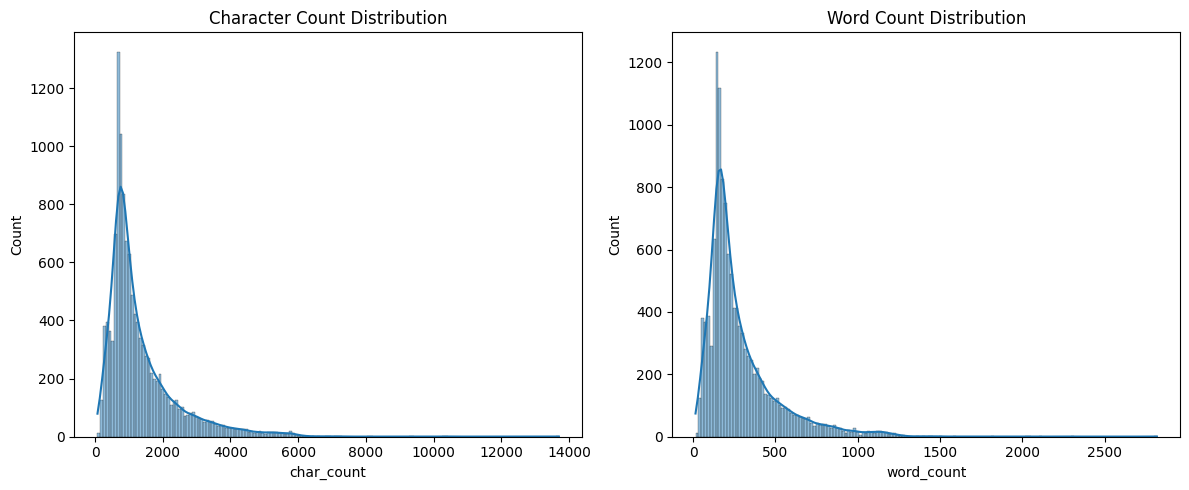

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df_pos['char_count'], kde=True, ax=axes[0])
axes[0].set_title('Character Count Distribution')

sns.histplot(df_pos['word_count'], kde=True, ax=axes[1])
axes[1].set_title('Word Count Distribution')

plt.tight_layout()
plt.show()

We now define stopwords in English language. A stopword is a word that doesn't provide any additionnal information to the sentence. For example, articles or pronouns or adverbs and so on. Any word that doesn't give any additional meaning is a stopword.
Stopwords are not our only issue with the text. We also have punctuations, HTML tags (added surely when extracting the dataset from Imdb website) and urls. So first we need to lower the case of our comments to avoid two identical words being mistakenly considered different because of upper cases or lower cases and so on. Then we clean our comments from useless token (urls, punctuations, etc), tokenize them and finally remove stopwords from them.

In [12]:
stop_words = set(stopwords.words('english'))

In [ ]:
print(dir(utils))

['Path', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'clean_text', 'load_corpus_from_folder', 'load_text_from_folder', 'nltk', 'os', 're', 'stop_words', 'stopwords', 'string', 'word_tokenize']


In [ ]:
df_pos['clean_text'] = df_pos['text'].apply(utils.clean_text)

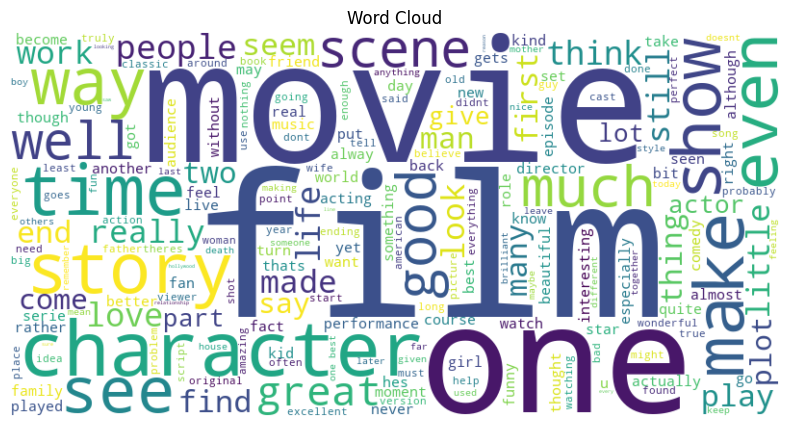

In [15]:
text_all = " ".join(df_pos['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud")
plt.show()

Based on this wordcloud, we can tell that the people who wrote the comments have a good rating of the film. Words like good, great, love, etc are correlated in the globality to positive comments.

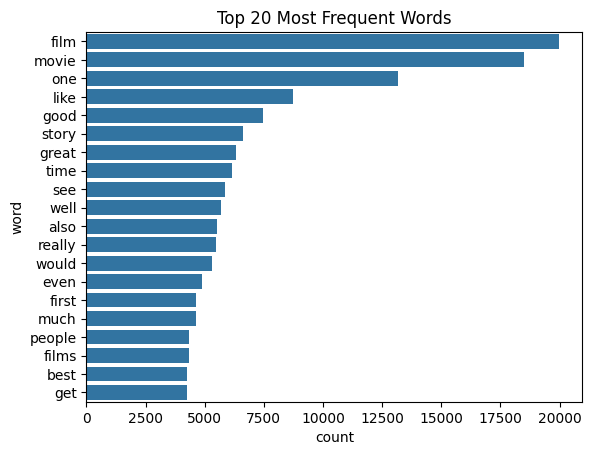

In [16]:
all_tokens = word_tokenize(text_all)
top_words = Counter(all_tokens).most_common(20)
top_words_df = pd.DataFrame(top_words, columns=['word', 'count'])

sns.barplot(data=top_words_df, x='count', y='word')
plt.title("Top 20 Most Frequent Words")
plt.show()

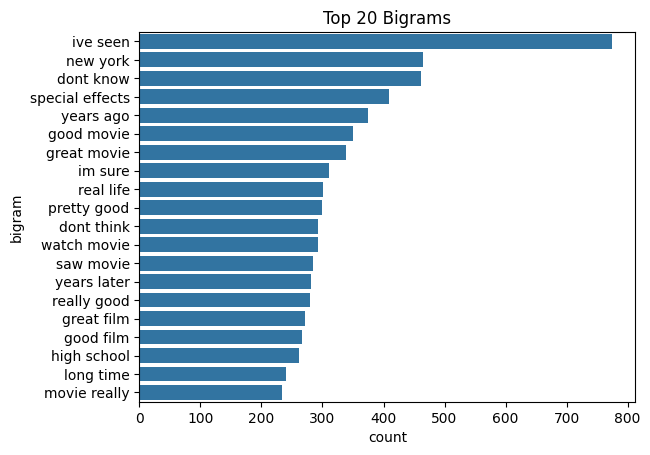

In [17]:
def get_top_ngrams(texts, ngram_range=(2,2), n=20):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(texts)
    bag_of_words = vec.transform(texts)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

top_bigrams = get_top_ngrams(df_pos['clean_text'], (2,2))
bigram_df = pd.DataFrame(top_bigrams, columns=['bigram', 'count'])

sns.barplot(data=bigram_df, x='count', y='bigram')
plt.title("Top 20 Bigrams")
plt.show()

## NEGATIVE COMMENTS

In [18]:
df_neg['char_count'] = df_neg['text'].apply(len)
df_neg['word_count'] = df_neg['text'].apply(lambda x: len(word_tokenize(x)))
df_neg['avg_word_length'] = df_neg['char_count'] / df_neg['word_count']

In [19]:
print("Basic statistics:\n", df_neg[['char_count', 'word_count', 'avg_word_length']].describe())

Basic statistics:
          char_count    word_count  avg_word_length
count  12500.000000  12500.000000     12500.000000
mean    1302.979040    280.444720         4.641210
std      957.067769    203.486066         0.341931
min       52.000000     11.000000         2.755725
25%      709.000000    154.000000         4.428571
50%      976.500000    211.000000         4.642857
75%     1568.000000    338.000000         4.860425
max     8969.000000   1936.000000         6.470588


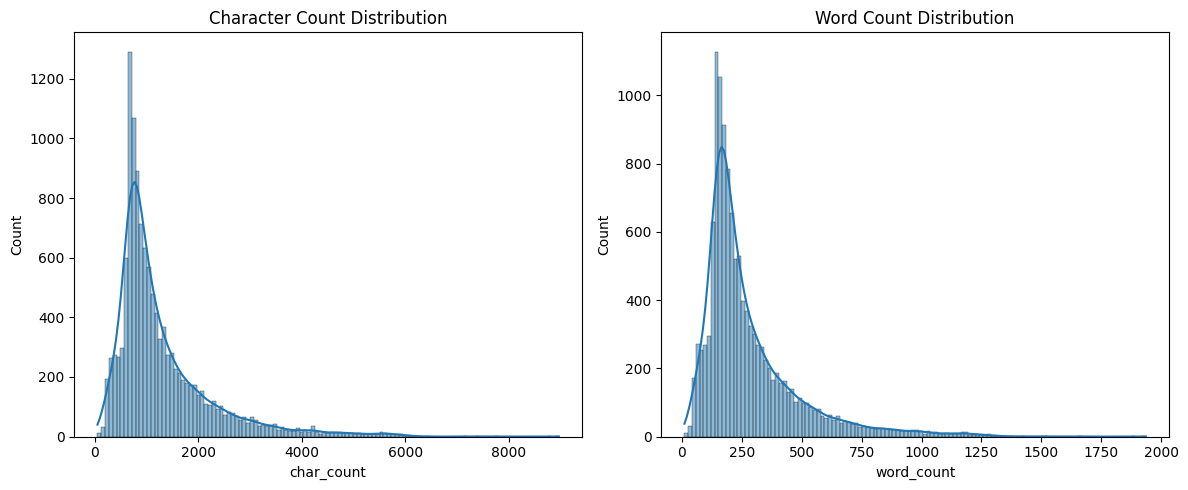

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df_neg['char_count'], kde=True, ax=axes[0])
axes[0].set_title('Character Count Distribution')

sns.histplot(df_neg['word_count'], kde=True, ax=axes[1])
axes[1].set_title('Word Count Distribution')

plt.tight_layout()
plt.show()

In [ ]:
df_neg['clean_text'] = df_neg['text'].apply(utils.clean_text)

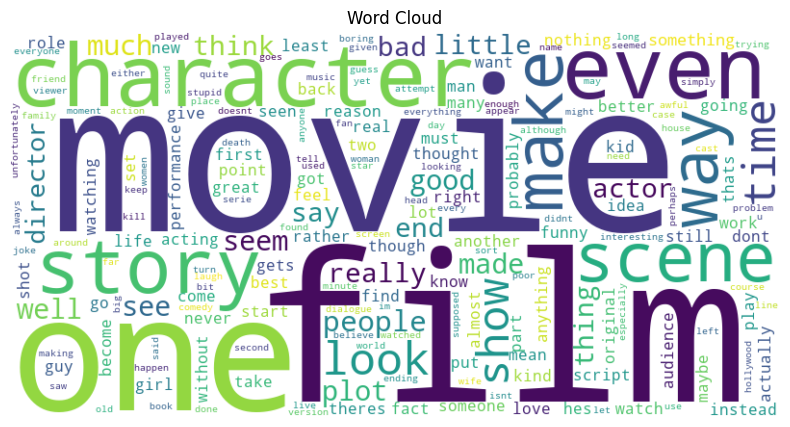

In [23]:
text_all = " ".join(df_neg['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud")
plt.show()

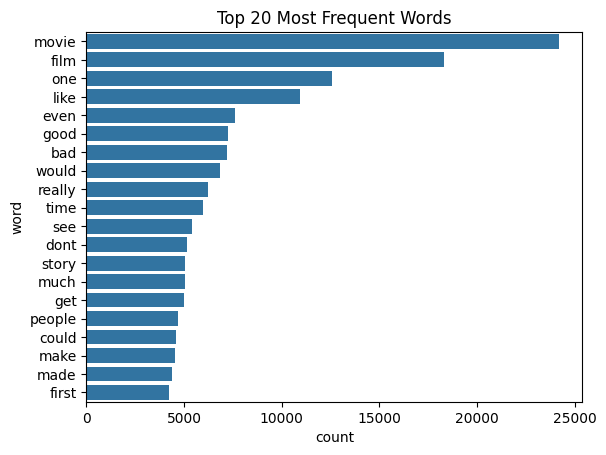

In [24]:
all_tokens = word_tokenize(text_all)
top_words = Counter(all_tokens).most_common(20)
top_words_df = pd.DataFrame(top_words, columns=['word', 'count'])

sns.barplot(data=top_words_df, x='count', y='word')
plt.title("Top 20 Most Frequent Words")
plt.show()

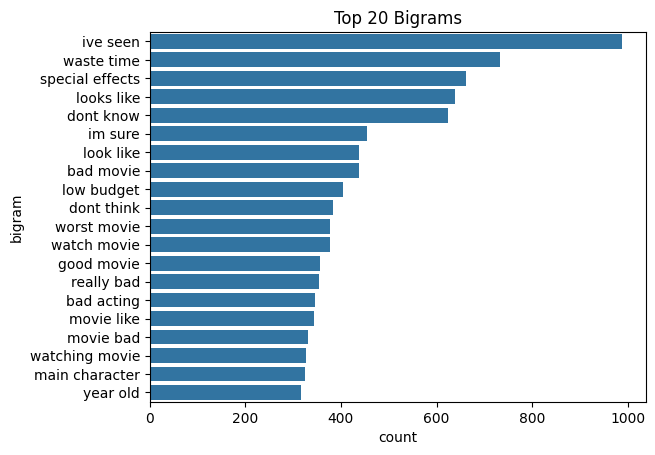

In [25]:
def get_top_ngrams(texts, ngram_range=(2,2), n=20):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(texts)
    bag_of_words = vec.transform(texts)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

top_bigrams = get_top_ngrams(df_neg['clean_text'], (2,2))
bigram_df = pd.DataFrame(top_bigrams, columns=['bigram', 'count'])

sns.barplot(data=bigram_df, x='count', y='bigram')
plt.title("Top 20 Bigrams")
plt.show()

In [26]:
df_neg.head()

,text,char_count,word_count,avg_word_length,clean_text
0,Story of a man who has unnatural feelings for ...,655,123,5.325203,story man unnatural feelings pig starts openin...
1,Airport '77 starts as a brand new luxury 747 p...,4466,899,4.967742,airport starts brand new luxury plane loaded v...
2,This film lacked something I couldn't put my f...,807,172,4.691860,film lacked something couldnt put finger first...
3,"Sorry everyone,,, I know this is supposed to b...",862,183,4.710383,sorry everyone know supposed art film wow hand...
4,When I was little my parents took me along to ...,2326,455,5.112088,little parents took along theater see interior...
